In [241]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# package imports to setup simulator experiments
from vsim import (
    electorate,
    voting_system,
    candidates,
    simulation
)
# 2d plot galtan lrecon, plotta partiernas väljare i olika färger? så att man ser tydligt hur dom genererades?
#plotta 3d graf och skapa gif
# och plotta T-SNE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([[2.77401234, 8.29976609],
       [7.72670746, 6.8127247 ],
       [3.29409799, 4.10575731],
       ...,
       [2.025204  , 1.83639264],
       [2.47627878, 7.36202402],
       [1.14492157, 4.63588974]])

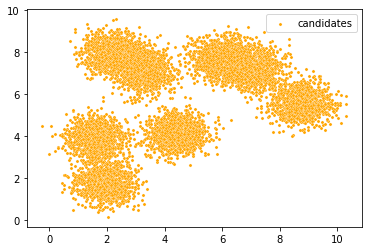

In [242]:
# params for generation; note that given O(n^2) for NN search, it is recommended to note over do population size.
SEED = 100
ISSUES = 2
POPULATION_SIZE = 10_000

sweden = electorate.setup_electorate(POPULATION_SIZE, ISSUES, scenario="sweden", seed=SEED)

# same but increase diversity of intra-cluster opinion; parameterised homogenity of opinion

"""
CLUSTER_STD = 3.5

fig, ax3 = plt.subplots( sharey=True, sharex=True, tight_layout=True, figsize=(9, 8))

# normal

sns.histplot(x=tripolar[:, 0], y=tripolar[:, 1], ax=ax3, label="voter")
ax3.set_title("tripolar - low dispersion")


fig.suptitle("Generated Electorates", fontsize=20)
plt.show()
"""

sns.scatterplot(x=sweden[:, 0], y=sweden[:, 1], label="candidates", s=10, color="orange")
sweden


<AxesSubplot:>

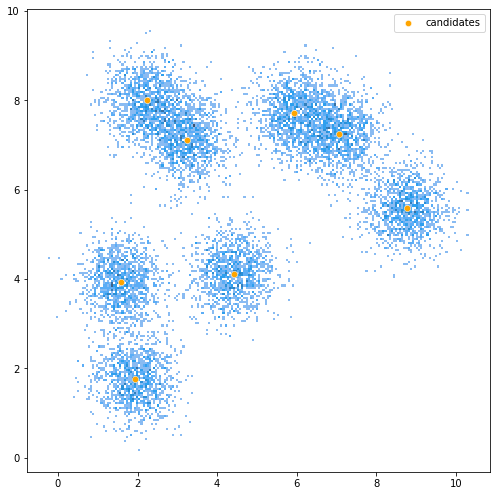

In [243]:
from vsim import (
    electorate,
    voting_system,
    candidates,
    simulation
)
sweden = electorate.setup_electorate(POPULATION_SIZE, ISSUES, scenario="sweden", seed=SEED)#
candidates = candidates.setup_candidates(candidates=1, electorate=sweden, scenario="sweden")#


fig, ax1 = plt.subplots(1,1, sharey=True, sharex=True, tight_layout=True, figsize=(7, 7))
sns.histplot(x=sweden[:,0], y=sweden[:,1], ax=ax1,bins=200)
sns.scatterplot(x=candidates[:,0], y=candidates[:,1], label="candidates", ax=ax1, s=40, color="orange")

# kolla vad som är mest fair teoretiskt sätt på random data och vad som är mest fair i sverige, 


In [244]:
candidates = candidates.setup_candidates(candidates=2, electorate=bipolar_wide, scenario="default")
result = voting_system.NaivePlurality({}).elect(candidates=candidates, electorate=bipolar_wide)
winner = list(result.winners)[0]

fig, ax1 = plt.subplots(1,1, sharey=True, sharex=True, tight_layout=True, figsize=(7, 7))
sns.histplot(x=bipolar_wide[:,0], y=bipolar_wide[:,1], ax=ax1)
sns.scatterplot(x=candidates[:,0], y=candidates[:,1], label="candidates", ax=ax1, s=100, color="orange")
fig.suptitle("Candidate positioning and election winner - plurality")

arrow_props = {
    "arrowstyle": "-|>",
    "connectionstyle": "angle3",
    "lw": 1,
}

# annotate the winner of the election
plt.annotate("Election Winner", candidates[winner, :], xytext=[-0.015, 0.025], xycoords='data', arrowprops=arrow_props)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'setup_candidates'